# **Load the Dataset**

In [1]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/Zero-Asif/data/refs/heads/main/electric-production.csv')

print(data.head())
print(data.info())

       DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB
None


# **Split the Dataset**

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

# Extract features and target
# Assuming 'IPG2211A2N' is the target and ignoring the 'DATE' column
X = data.iloc[:, 1:].values  # Features (excluding 'DATE')
y = data.iloc[:, 1].values   # Target (IPG2211A2N)

# Split into training (70%), validation (15%), and testing (15%) datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (277, 1), (277,)
Validation data shape: (60, 1), (60,)
Testing data shape: (60, 1), (60,)


# **Build and Train a CNN Model**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Conv1D(filters=32, kernel_size=1, activation='relu'),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)  # Regression output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=1)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5930.9258 - mae: 75.0319 - val_loss: 1590.8536 - val_mae: 39.1632
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1007.1053 - mae: 27.9353 - val_loss: 76.7693 - val_mae: 8.6193
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 230.1612 - mae: 12.6640 - val_loss: 21.6956 - val_mae: 4.5608
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 126.8598 - mae: 8.2918 - val_loss: 7.8529 - val_mae: 2.7377
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102.4304 - mae: 7.8030 - val_loss: 9.4317 - val_mae: 3.0015
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89.8910 - mae: 7.8401 - val_loss: 14.3181 - val_mae: 3.7014
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.4102 - mae: 5.9393 - val_loss: 25.0672 - val_mae: 4.9020
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.1209 - mae: 6.7649 - val_loss: 25.3712 - val_mae: 4.9313
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

# **Test the Model**

In [8]:
# Evaluate the model on the test dataset
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Mean Absolute Error: {test_mae}")

# Predict on the test dataset
y_pred = model.predict(X_test)

Test Loss: 144.25390625
Test Mean Absolute Error: 11.796751022338867
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


# **Plot the Graphs**

## **Ploting true Values**

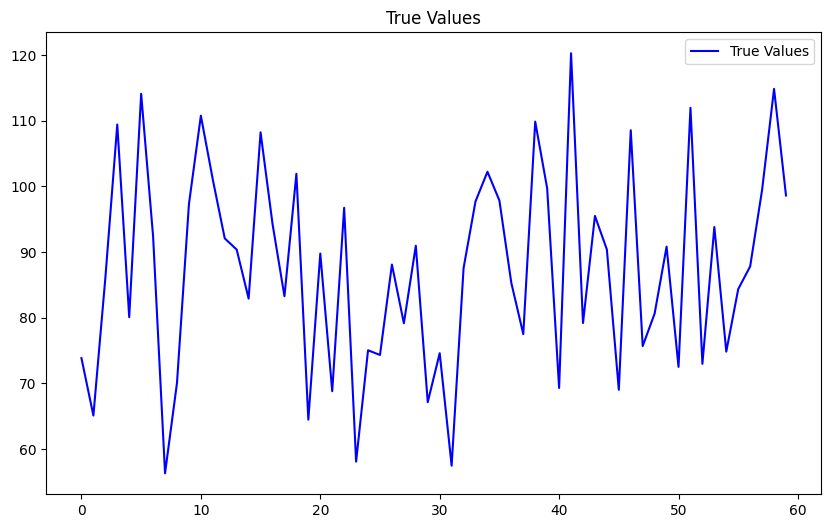

In [10]:
import matplotlib.pyplot as plt

# Plot true values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', color='blue')
plt.title('True Values')
plt.legend()
plt.show()

## **Plotting Predicted Values**

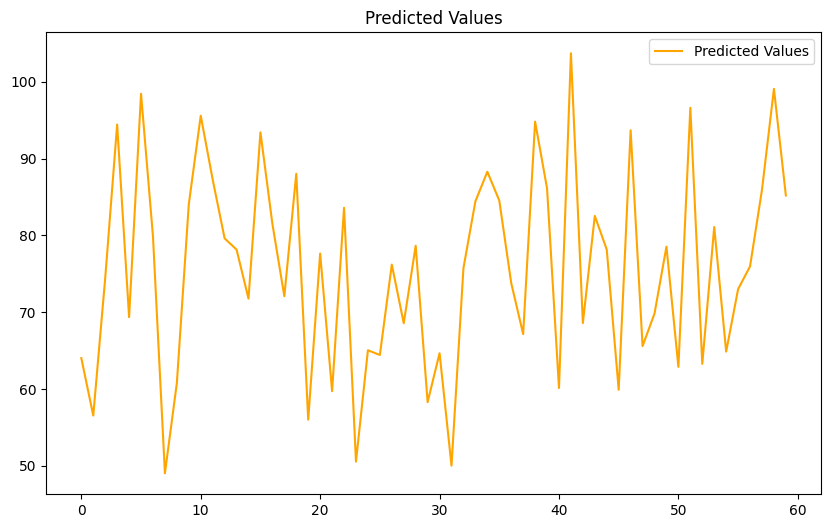

In [11]:
# Plot predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_pred, label='Predicted Values', color='orange')
plt.title('Predicted Values')
plt.legend()
plt.show()

## **Compairing True and Predicted Valus**

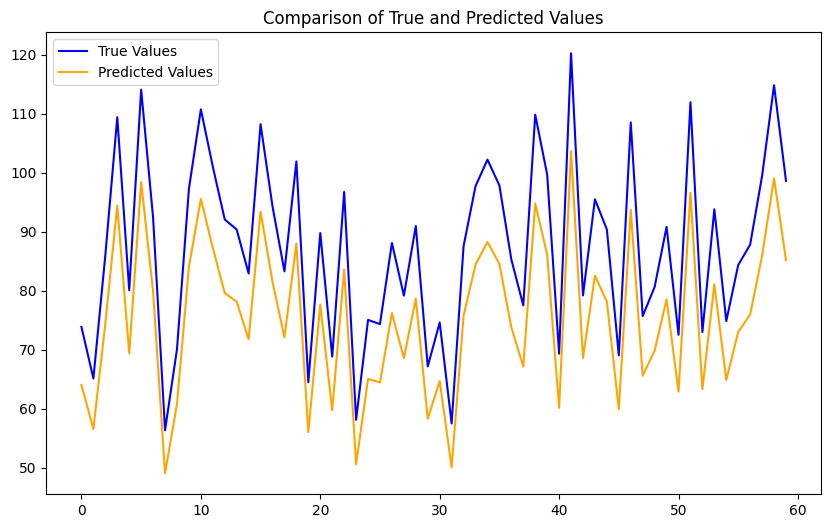

In [12]:
# Combined graph
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='orange')
plt.title('Comparison of True and Predicted Values')
plt.legend()
plt.show()